In [0]:
# импорт библиотек
import numpy as np
import cv2
from matplotlib import pyplot as plt

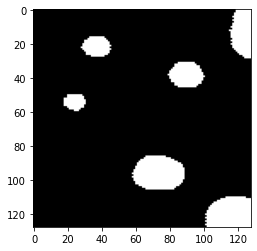

In [141]:
# загружаем изображение и бинаризуем по порогу
img_source = cv2.imread('good_picture.png')
img = cv2.cvtColor(img_source, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img, 70, 255, cv.THRESH_BINARY_INV)
plt.imshow(thresh, cmap = 'gray')

In [0]:
kernel = np.ones((5, 5), np.uint8)

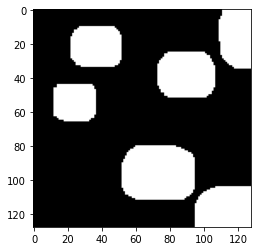

In [143]:
# находим пиксели, гарантированно принадлежащие фону
background = cv2.dilate(thresh, kernel, iterations = 3)
plt.imshow(background, cmap = 'gray')

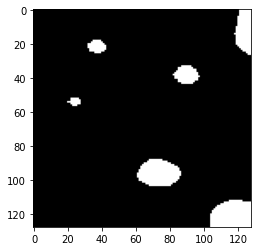

In [144]:
# находим пиксели, гарантированно принадлежащие объектам
objects = cv2.erode(thresh, kernel)
plt.imshow(objects, cmap = 'gray')

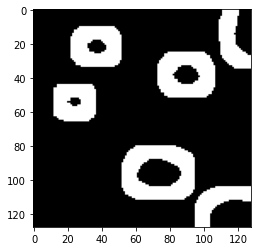

In [145]:
# находим пиксели с неопределённым статусом
unknown = cv2.subtract(background, objects)
plt.imshow(unknown, cmap = 'gray')

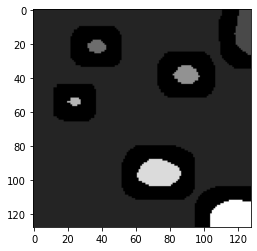

In [148]:
# создаём массив маркеров
ret, markers = cv2.connectedComponents(objects)
markers = markers+1
markers[unknown==255] = 0
plt.imshow(markers, cmap = 'gray')

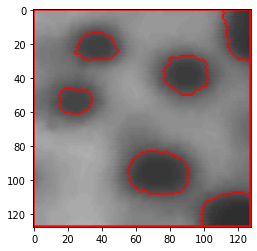

In [147]:
# применяем водораздел
markers = cv2.watershed(img_source,markers)
img_source[markers == -1] = [255,0,0]
plt.imshow(img_source)